In [12]:
# TensorFlow and tf.keras
import math
import tensorflow as tf
import numpy as np
from tensorflow import keras

from tensorboard.plugins.hparams import api as hp
import matplotlib.pyplot as plt
import numpy as np

#tf version should be 2.5 or higher
tf.__version__

'2.6.0'

In [13]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.fashion_mnist.load_data()

In [14]:
#scale model
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
#reshape
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [36]:
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adadelta','adagrad','adam', 'adamax', 'ftrl', 'nadam', 'rmsprop', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [16]:
def lr_decay(epoch):
    return 0.01*math.pow(0.6, epoch)

lr_decay_callback=tf.keras.callbacks.LearningRateScheduler(lr_decay)

In [38]:
#setup model
def train_test_model(hparams):
  model = keras.Sequential([
   
    
    keras.layers.Conv2D(kernel_size=3, filters=32, use_bias=False, padding='same', input_shape=(28, 28 , 1)),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    
   
    
    
    
    keras.layers.Conv2D(kernel_size=6, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    
   
    
    keras.layers.Conv2D(kernel_size=6, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
        
    
    
   
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(128, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
  model.compile(optimizer=hparams[HP_OPTIMIZER],
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
  

  model.fit(train_images, train_labels, epochs=5, callbacks=[lr_decay_callback]) 
  _, accuracy = model.evaluate(test_images, test_labels)
  return accuracy

In [39]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy 

In [40]:
session_num = 0
accuracy_1=[0,0,0,0,0,0,0,0]

for optimizer in HP_OPTIMIZER.domain.values:
  hparams = {
    HP_OPTIMIZER: optimizer,
  }
  run_name = "run-%d" % session_num
  print('--- Starting trial: %s' % run_name)
  print({h.name: hparams[h] for h in hparams})
  accuracy_1[session_num]=run('logs/hparam_tuning/' + run_name, hparams)
  session_num += 1

--- Starting trial: run-0
{'optimizer': 'adadelta'}
Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 1.3056 - accuracy: 0.5869
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.8453 - accuracy: 0.7631
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.7474 - accuracy: 0.7939
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.7040 - accuracy: 0.8050
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.5263 - accuracy: 0.8423
--- Starting trial: run-1
{'optimizer': 'adagrad'}
Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.5465 - accuracy: 0.8235
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3491 - accuracy: 0.8849
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2945 - accuracy: 0.9031
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 

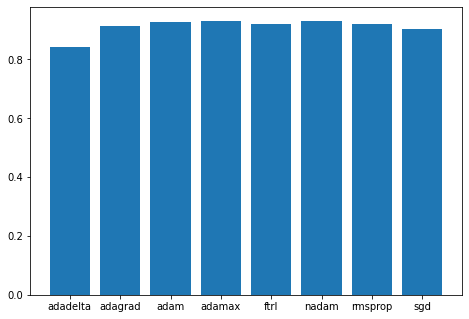

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
opti = ['adadelta','adagrad','adam', 'adamax', 'ftrl', 'nadam', 'rmsprop' ,'sgd']
ax.bar(opti,accuracy_1)
plt.show()

In [152]:
activ=['relu', 'selu',  'elu']
sam=0
ll=[0,1,2]
for i in ll:
  for j in ll:
    for k in ll:
      haip[sam]=np.array([activ[i], activ[j], activ[k]])
      sam+=1
METRIC_ACCURACY = 'accuracy'


In [153]:

#setup model
def train_test_model(hparams):
  model = keras.Sequential([
   
    
    keras.layers.Conv2D(kernel_size=3, filters=32, use_bias=False, padding='same', input_shape=(28, 28 , 1)),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation(hparams[0]),
    
    
   
    
    
    
    keras.layers.Conv2D(kernel_size=6, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation(hparams[1]),
    
    
   
    
    keras.layers.Conv2D(kernel_size=6, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation(hparams[2]),
    
        
    
    
   
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(128, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
  model.compile(optimizer='adamax',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
  

  model.fit(train_images, train_labels, epochs=5, callbacks=[lr_decay_callback]) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(test_images, test_labels)
  return accuracy

In [161]:
def run( haip):
  accuracy=0
  accuracy = train_test_model(haip)
    
  return accuracy 


In [162]:
session_num = 0
accuracy_1= np.zeros(27)

for i in range(27):
  run_name = "run-%d" % session_num
  print('--- Starting trial: %s' % run_name)
  print({'acrivation': haip[i]})
  accuracy_1[session_num]=run( haip[i])
  session_num += 1

--- Starting trial: run-0
{'acrivation': array(['relu', 'relu', 'relu'], dtype='<U4')}
Epoch 1/5
1875/1875 [==============================] - 58s 30ms/step - loss: 0.4857 - accuracy: 0.8321
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3082 - accuracy: 0.8927
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2357 - accuracy: 0.9181
Epoch 4/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.1879 - accuracy: 0.9342
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.1946 - accuracy: 0.9354
--- Starting trial: run-1
{'acrivation': array(['relu', 'relu', 'selu'], dtype='<U4')}
Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.5124 - accuracy: 0.8195
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3279 - accuracy: 0.8852
Epoch 3/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.2585 - accuracy: 0.9099
Epoch 

In [165]:
print(haip[np.where(max(accuracy_1))])


[array(['relu', 'relu', 'relu'], dtype='<U4')]


In [181]:
unit=[16, 32,  64]
sam=0
ll=[0,1,2]
haip2=np.zeros((27,3))
for i in ll:
  for j in ll:
    for k in ll:
      haip2[sam]=np.array([unit[i], unit[j], unit[k]])
      sam+=1
METRIC_ACCURACY = 'accuracy'
print(haip2)

[[16. 16. 16.]
 [16. 16. 32.]
 [16. 16. 64.]
 [16. 32. 16.]
 [16. 32. 32.]
 [16. 32. 64.]
 [16. 64. 16.]
 [16. 64. 32.]
 [16. 64. 64.]
 [32. 16. 16.]
 [32. 16. 32.]
 [32. 16. 64.]
 [32. 32. 16.]
 [32. 32. 32.]
 [32. 32. 64.]
 [32. 64. 16.]
 [32. 64. 32.]
 [32. 64. 64.]
 [64. 16. 16.]
 [64. 16. 32.]
 [64. 16. 64.]
 [64. 32. 16.]
 [64. 32. 32.]
 [64. 32. 64.]
 [64. 64. 16.]
 [64. 64. 32.]
 [64. 64. 64.]]


In [182]:
#setup model
def train_test_model(hparams):
  model = keras.Sequential([
   
    
    keras.layers.Conv2D(kernel_size=3, filters=hparams[0], use_bias=False, padding='same', input_shape=(28, 28 , 1)),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    
   
    
    
    
    keras.layers.Conv2D(kernel_size=6, filters=hparams[1], use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    
   
    
    keras.layers.Conv2D(kernel_size=6, filters=hparams[2], use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
        
    
    
   
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(128, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
  model.compile(optimizer='adamax',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
  

  model.fit(train_images, train_labels, epochs=5, callbacks=[lr_decay_callback]) 
  _, accuracy = model.evaluate(test_images, test_labels)
  return accuracy

In [184]:
def run( haip):
  accuracy = train_test_model(haip)
    
  return accuracy 


In [186]:
session_num = 0
accuracy_2= np.zeros(27)

for i in range(27):
  run_name = "run-%d" % session_num
  print('--- Starting trial: %s' % run_name)
  print({'acrivation': haip2[i]})
  accuracy_2[session_num]=run( haip2[i])
  session_num += 1

--- Starting trial: run-0
{'acrivation': array([16., 16., 16.])}
Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4782 - accuracy: 0.8352
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3141 - accuracy: 0.8890
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2520 - accuracy: 0.9104
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2143 - accuracy: 0.9235
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2267 - accuracy: 0.9183
--- Starting trial: run-1
{'acrivation': array([16., 16., 32.])}
Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4741 - accuracy: 0.8359
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3053 - accuracy: 0.8932
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2409 - accuracy: 0.9139
Epoch 4/5
1875/1875 [=============================

In [1]:
print(haip2[np.where(max(accuracy_2))])

NameError: ignored

In [17]:
model = keras.Sequential([
   
  keras.layers.Conv2D(kernel_size=3, filters=16, use_bias=False, padding='same', input_shape=(28, 28 , 1)),
  keras.layers.BatchNormalization(center=True, scale=False),
  keras.layers.Activation('relu'),
    
    
   
    
    
    
  keras.layers.Conv2D(kernel_size=6, filters=64, use_bias=False, padding='same', strides=2),
  keras.layers.BatchNormalization(center=True, scale=False),
  keras.layers.Activation('relu'),
    
    
   
    
  keras.layers.Conv2D(kernel_size=6, filters=64, use_bias=False, padding='same', strides=2),
  keras.layers.BatchNormalization(center=True, scale=False),
  keras.layers.Activation('relu'),
    
        
    
    
   
    
  keras.layers.Flatten(),
    
  keras.layers.Dense(256, use_bias=False),
  keras.layers.BatchNormalization(center=True, scale=False),
  keras.layers.Activation('relu'),
  keras.layers.Dropout(0.1),
    
  keras.layers.Dense(128, use_bias=False),
  keras.layers.BatchNormalization(center=True, scale=False),
  keras.layers.Activation('relu'),
  keras.layers.Dropout(0.2),
    
  keras.layers.Dense(64, use_bias=False),
  keras.layers.BatchNormalization(center=True, scale=False),
  keras.layers.Activation('relu'),
  keras.layers.Dropout(0.3),
    
  keras.layers.Dense(10, activation = tf.nn.softmax)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 16)        48        
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36864     
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        192       
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)         

In [18]:
model.compile(optimizer='adamax',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
  

In [19]:
#train model
model.fit(train_images, train_labels, epochs=5, callbacks=[lr_decay_callback])

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.4851 - accuracy: 0.8320
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3076 - accuracy: 0.8932
Epoch 3/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2388 - accuracy: 0.9166
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1867 - accuracy: 0.9348
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1553 - accuracy: 0.9459


In [20]:
#evaluate
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.2057 - accuracy: 0.9311

Test accuracy: 0.9311000108718872
